## Project 5

**Mohammad Kamal Sadeghabadi Farahani**

### Description

In this project we have implemented three type of encoders for input data:

1. Time to first spike encdoer
2. Position encoder
3. Poisson encoder

We have four images as input to encoders, the first three are images from the same person and thus share some similar features with each other and the forth one is the image of a cartoon robot, we expect that the encoding for the first three images have some similarities to each other and be fairly diffrent from the encoding of forth image.  
First we will resize images and turn them to the black and white version.

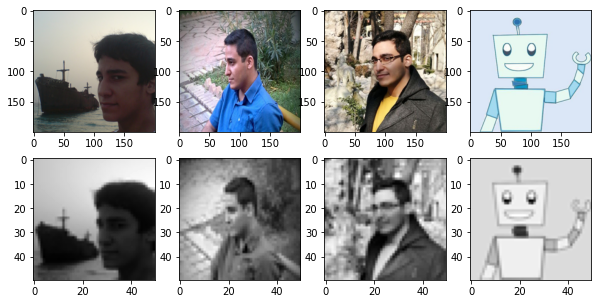

In [57]:
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

sys.path.insert(0, '../../')

from cnsproject.plotting.plotting import raster_plot, plot_position_encoder_result
from cnsproject.encoding.encoders import Time2FirstSpikeEncoder, PositionEncoder, PoissonEncoder

image_size = (50, 50)
images = [Image.open('./images/img1.jpg'), Image.open('./images/img2.jpg'), Image.open('./images/img3.jpg'), Image.open('./images/img4.jpg')]
images_tensors = [ torch.tensor(np.asarray(img.convert('RGB').convert('L').resize(image_size))) for img in images ]

time = 0.25
dt = 0.001
min_val = 0
max_val = 255

fig = plt.figure(figsize=(10, 5))
rows = 2
columns = 4

for idx, img in enumerate(images):
    fig.add_subplot(rows, columns, idx + 1)
    plt.imshow(img.resize((200,200)))

for idx, img_tensor in enumerate(images_tensors):
    fig.add_subplot(rows, columns, idx + 5)
    plt.imshow(img_tensor, cmap='gray')

### Time to first spike encoder

Image 1 raster plot: 


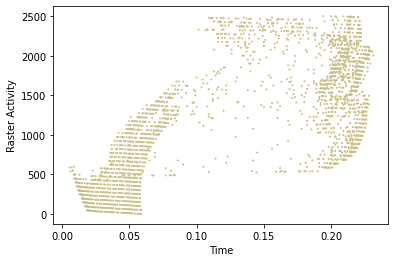

Image 2 raster plot: 


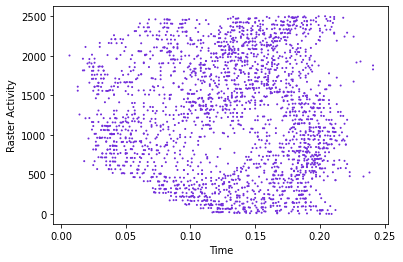

Image 3 raster plot: 


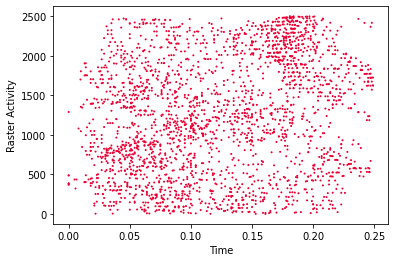

Image 4 raster plot: 


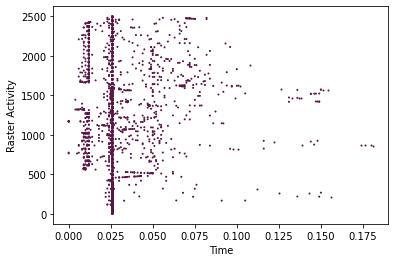

In [59]:
encoder = Time2FirstSpikeEncoder(time=time)

for idx, img_tensor in enumerate(images_tensors):
    coded = encoder(min_val, max_val, img_tensor)
    print(f'Image {idx + 1} raster plot: ')
    raster_plot([coded], dt)

### Analysis of time to first spike encoder:

The time to first spike encoder preserves both position and intensity of a pixel, because each neuron corresponds to a unique pixel in the image and neurons with higer intensity spike faster than lower ones.  
As we can see the image 2 and 3 are very similar to each other and the generated rasetr plot for image 2 and 3 are fairly similar, in image 1 we have another object in the background which is a ship so we can see that its rater plot is somehow diffrent from images 2 and 3, at last we have the raster plot of image 4 which is fairly diffrent from other images as we expected.  
Further more we can see that in the image 4 we have small variance between the value of pixels and thus most neurons have spikes around the same point in time, but in other images specially image 3 we have high variance among the value of pixels so we can see that the raster plot is more scattered for them. also we can see that in each raster plot we have clusters of neurons that have spiked almost around the same point in time, these are neurons that have almost the same values for example neurons corresponding to pixels that represent the hair, sky, coat and etc.

### Position encoder

Image 1 raster plot: 


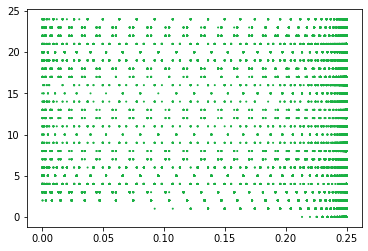

Image 2 raster plot: 


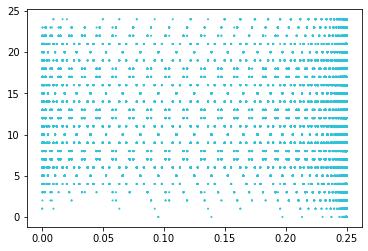

Image 3 raster plot: 


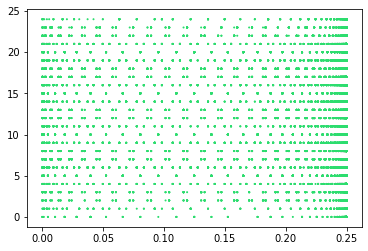

Image 4 raster plot: 


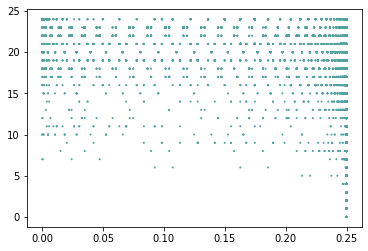

In [60]:
neurons_number = 25
encoder = PositionEncoder(time=time, neurons_number=neurons_number)
for idx, img_tensor in enumerate(images_tensors):
    coded = encoder(min_val, max_val, img_tensor)
    print(f'Image {idx + 1} raster plot: ')
    plot_position_encoder_result(coded, img_tensor.shape, neurons_number, dt)

### Analysis of position encoder

One thing that is clear from the definition of position encoder is that it **dosen't** preserve the position of pixels (ironically), in other words the information about the position of each pixel is lost in this encoding, instead the information that is preserved well in this encoding is the variance of values of pixels in the image. for each neuron if we have more activity at the start of time it means that the value of more pixels in the image are close to the number that this neuron is representing.  
In this example we have used 25 neurons for encoding the value of each pixel which is between 0 to 255, as we can see we have the most variance in the image 3 and this fact is reflected in the raster plot corresponding to image 3, and we have the least variance in the image 4 and from the raster plot we can see that neurons below 10 doesn't have much activity at the beginning of time this means that most of pixels have the value higher than 102, which in fact is the case. for other images the same arguments can be made. 

### Poisson encoder

Image 1 raster plot: 


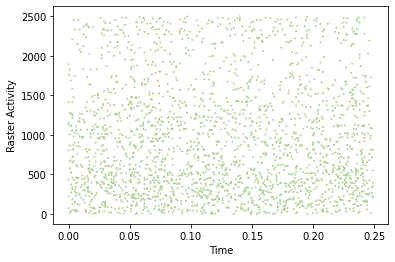

Image 2 raster plot: 


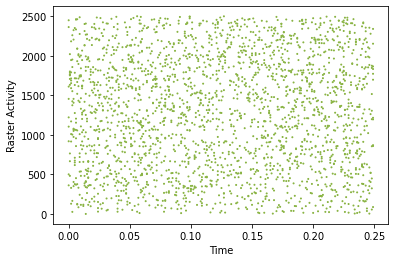

Image 3 raster plot: 


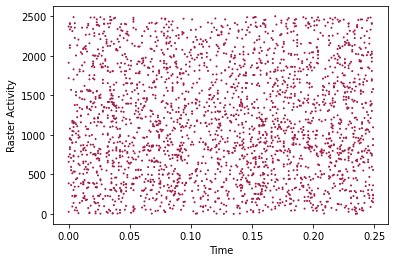

Image 4 raster plot: 


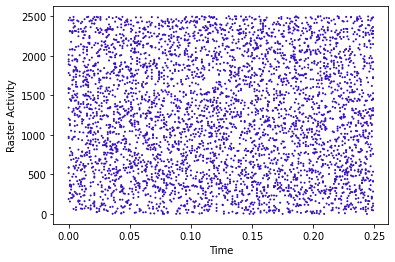

In [61]:
max_spikes = 2
encoder = PoissonEncoder(time=time, max_spikes=max_spikes)

for idx, img_tensor in enumerate(images_tensors):
    coded = encoder(min_val, max_val, img_tensor)
    print(f'Image {idx + 1} raster plot: ')
    raster_plot([coded], dt)

### Analysis of poisson encoder

The poisson encoder is very much like the time to first spike encoder it preserves both position and intensity in its encoding, position is preserved because each neuron corresponds to a unique pixel in the image, and intensity is preserved by how many times a neuron corresponding to a pixel is spiked.  
As we can see in the raster plot corresponding to image 1 the intensity of neurons from 1500 to 2000 are low, these are probably pixels that represent ship which are dark and low value pixels.  
In the raster plot corresponding to image 4 we can see that most pixels have a high intensity which is in fact the case.  
the same arguments can be made for other two images.